#### **MAKİNE ÖĞRENMESİ ALGORİTMALARI**

**1.Denetimli Öğrenme Algoritmaları**
- Linear regression
- Logistic regression
- Linear Discriminant analysis
- Decision trees
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Support Vector Machine (SVM)
- Random Forest
- Gradient Boosting Machine (GBM)
- Gradient Descent
- Gauss-Newton
- Maximum Likelihood

**2.Denetimsiz Öğrenme Algoritmaları**
- K-means
- Hierarchical Clustering
- Gauss Mixture models
- t-SNE
- appriori
- Expectation Maximization

**3.Yarı Denetimli Öğrenme Algoritmaları**
- Self-training
- Co-training

### **1.Denetimli Öğrenme Algoritmaları**
### Linear regression
- Doğrusal regresyon, bir bağımlı değişken ile bir veya daha 
fazla bağımsız değişken arasındaki ilişkiyi modellemek için kullanılan
bir istatistiksel yöntemdir. Temelde, bağımsız değişkenlerin lineer bir
kombinasyonunu kullanarak bağımlı değişkenin tahmin edilmesini amaçlar.


95 metrekarelik bir evin tahmin edilen fiyatı: 285.00 bin TL


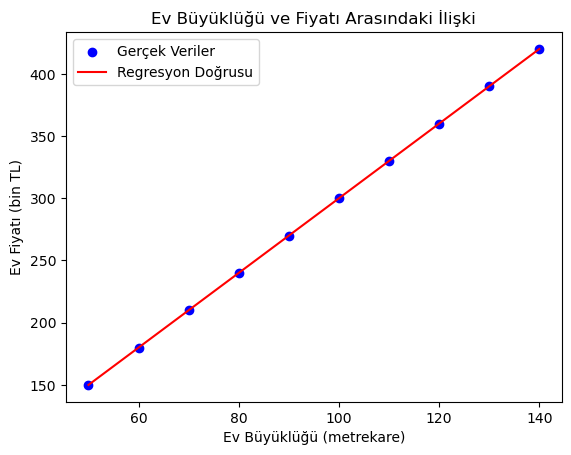

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Örnek veri: ev büyüklükleri (metrekare cinsinden)
X = np.array([[50], [60], [70], [80], [90], [100], [110], [120], [130], [140]])

# Örnek veri: ev fiyatları (bin TL cinsinden)
y = np.array([150, 180, 210, 240, 270, 300, 330, 360, 390, 420])

# Lineer regresyon modelini oluşturma
model = LinearRegression()

# Modeli eğitme
model.fit(X, y)

# 95 metrekarelik bir evin fiyatını tahmin etme
predicted_price = model.predict(np.array([[95]]))

print(f"95 metrekarelik bir evin tahmin edilen fiyatı: {predicted_price[0]:.2f} bin TL")

# Veri noktalarını ve regresyon doğrusunu çizme
plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, model.predict(X), color='red', label='Regresyon Doğrusu')

plt.xlabel('Ev Büyüklüğü (metrekare)')
plt.ylabel('Ev Fiyatı (bin TL)')
plt.title('Ev Büyüklüğü ve Fiyatı Arasındaki İlişki')
plt.legend()
plt.show()

### Decision Trees
- Karar ağaçları, veri kümesindeki özellikleri kullanarak bir hedef değişkenin değerini tahmin etmek veya sınıflandırmak için kullanılan bir modeldir. Karar ağacı, veri kümesindeki her bir özelliği kullanarak bir ağaç yapısı oluşturur ve her düğümde bir karar alır.

C:\Users\zeyna\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3.5 saat ders çalışan bir öğrencinin sınavı geçme tahmini: Geçmedi


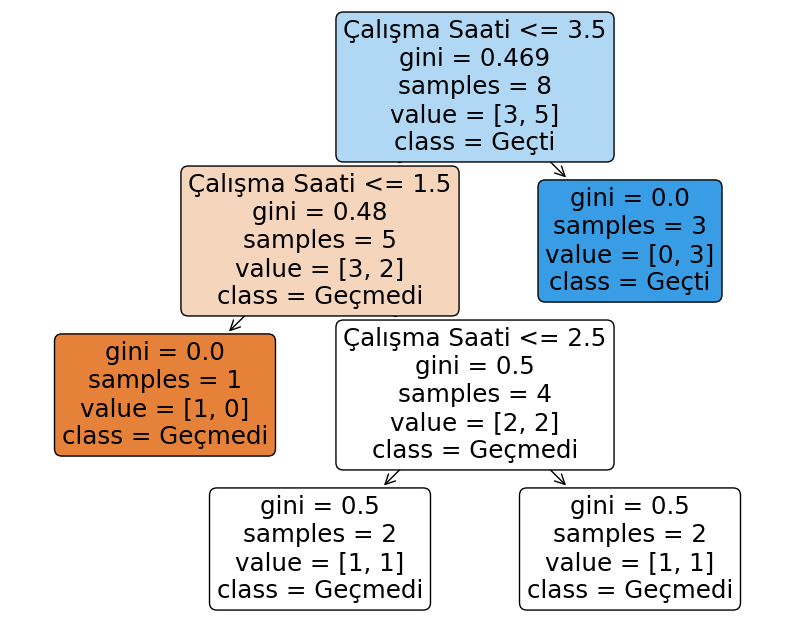

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Veri setini oluşturma
data = {
    'Çalışma Saati': [1, 2, 2, 3, 3, 4, 4, 5],
    'Geçti': [0, 0, 1, 0, 1, 1, 1, 1]
}

# Veriyi bir DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Özellikler (bağımsız değişkenler)
X = df[['Çalışma Saati']]

# Hedef değişken (bağımlı değişken)
y = df['Geçti']

# Karar ağacı modelini oluşturma
clf = DecisionTreeClassifier()

# Modeli eğitme
clf.fit(X, y)

# Tahmin yapma
prediction = clf.predict([[3.5]])
print(f"3.5 saat ders çalışan bir öğrencinin sınavı geçme tahmini: {'Geçti' if prediction[0] == 1 else 'Geçmedi'}")

# Karar ağacını görselleştirme
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['Çalışma Saati'], class_names=['Geçmedi', 'Geçti'], filled=True, rounded=True)
plt.show()


### K-Nearest Neighbors (KNN)
- KNN, bir örneğin sınıflandırılması veya bir değerin tahmin edilmesi için kullanılan basit ve temel bir makine öğrenimi algoritmasıdır. Bir veri noktasının etiketini tahmin etmek için, o noktaya en yakın olan k komşusunun etiketlerini kullanır.

Modelin doğruluğu: 1.00
Yeni örnek verinin tahmin edilen türü: setosa


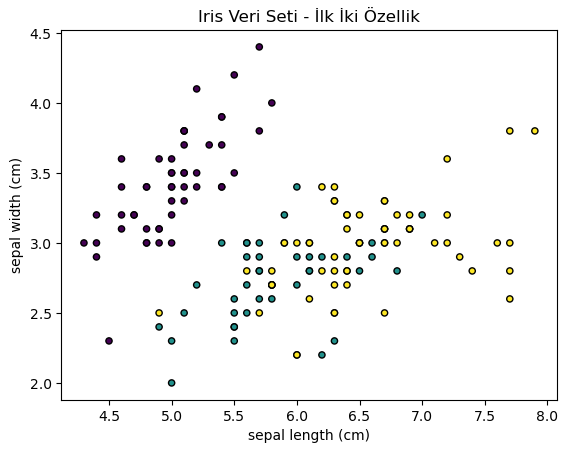

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Iris veri setini yükleme
iris = load_iris()
X = iris.data  # Özellikler
y = iris.target  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Modeli eğitim verisi ile eğitme
knn.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = knn.predict(X_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluğu: {accuracy:.2f}")

# Yeni bir veri üzerinde tahmin yapma
new_sample = np.array([[5.0, 3.6, 1.4, 0.2]])  # Yeni örnek veri
new_prediction = knn.predict(new_sample)
print(f"Yeni örnek verinin tahmin edilen türü: {iris.target_names[new_prediction][0]}")

# Özellikleri görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Veri Seti - İlk İki Özellik')
plt.show()


### Naive Bayes
- Naive Bayes, Bayes teoremi ve özellikler arasındaki bağımsızlık varsayımına dayanan olasılığa dayalı bir sınıflandırma algoritmasıdır. Naive Bayes, özelliklerin sınıfı nasıl etkilediğini modellemek için kullanılır.

Doğruluk Skoru:  1.0


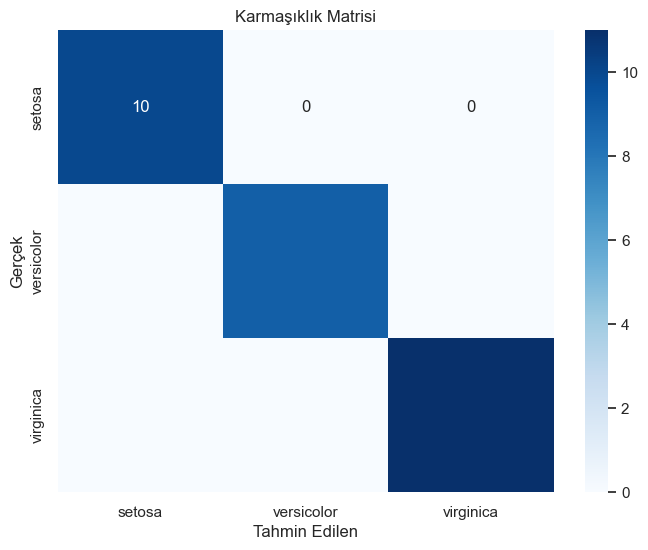

In [7]:
# Gerekli kütüphaneleri içe aktaralım
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Seaborn stilini kullanalım
sns.set(style="whitegrid")

# Iris veri setini yükleyelim
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes modelini oluşturalım ve eğitelim
model = GaussianNB()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Tahmin sonuçlarını ve doğruluk skorunu yazdıralım
print("Doğruluk Skoru: ", accuracy_score(y_test, y_pred))

# Confusion matrix (karmaşıklık matrisi) oluşturalım
conf_matrix = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()


### Gradient Descent
- Gradient Descent, bir fonksiyonun minimum noktasını bulmak için iteratif bir optimizasyon algoritmasıdır. Gradient Descent, bir fonksiyonun gradyanını (eğimi) kullanarak her adımda fonksiyonun değerini azaltmaya çalışır.

theta_0: 0.22015995811156303
theta_1: 1.9390192218793783


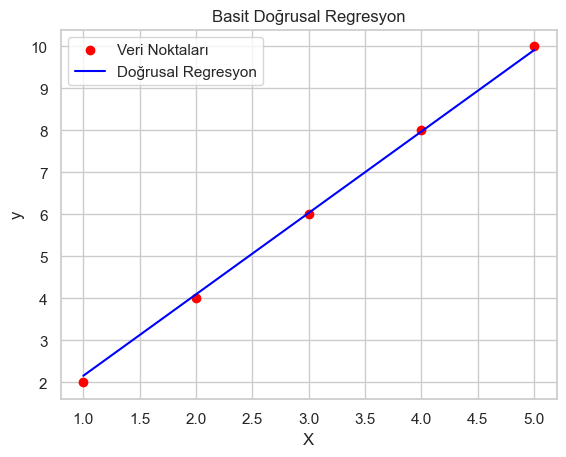

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Basit bir veri seti oluşturalım
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Başlangıç parametreleri (teta_0 ve teta_1)
theta_0 = 0
theta_1 = 0

# Öğrenme oranı
learning_rate = 0.05

# Epoch sayısı
epochs = 100

# Gradient Descent algoritması
for _ in range(epochs):
    # Tahmin edilen değerler
    y_pred = theta_0 + theta_1 * X
    
    # Hata (error)
    error = y_pred - y
    
    # Parametre güncelleme
    theta_0 -= learning_rate * (1/len(X)) * np.sum(error)
    theta_1 -= learning_rate * (1/len(X)) * np.sum(error * X)

# Sonuçları yazdırma
print("theta_0:", theta_0)
print("theta_1:", theta_1)

# Veriyi ve doğrusal regresyonu görselleştirme
plt.scatter(X, y, color='red', label='Veri Noktaları')
plt.plot(X, theta_0 + theta_1 * X, color='blue', label='Doğrusal Regresyon')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Basit Doğrusal Regresyon')
plt.legend()
plt.show()

### **2.Denetimsiz Öğrenme Algoritmaları**
### K-Means
- K-means, veri noktalarını k belirli sayıda küme (cluster) içine gruplamak için kullanılan bir kümeleme algoritmasıdır. Her küme, küme merkezine (centroid) en yakın olan veri noktaları tarafından tanımlanır.

C:\Users\zeyna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zeyna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


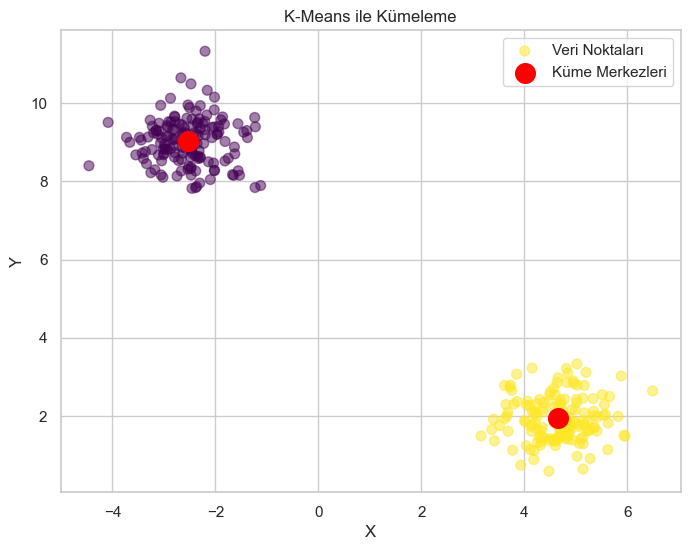

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Rastgele veri noktaları oluşturalım
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=42)

# K-Means modelini oluşturalım ve eğitelim
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Küme merkezlerini ve küme etiketlerini alalım
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Veri noktalarını ve küme merkezlerini görselleştirelim
plt.figure(figsize=(8, 6))

# Veri noktalarını görselleştirme
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, label='Veri Noktaları')

# Küme merkezlerini görselleştirme
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, label='Küme Merkezleri')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means ile Kümeleme')
plt.legend()
plt.show()
